In [1]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

# File to Load (Remember to Change These)
california_crimes_df = Path("Resources/california_department_of_justice_1998_to_2023.csv")
US_inflation_rates_df = Path("Resources/US_Inflation_Rates_1998_to_2023.csv")

# Read School and Student Data File and store into Pandas DataFrames
california_crimes = pd.read_csv(california_crimes_df)
US_inflation_rates = pd.read_csv(US_inflation_rates_df)

In [2]:
california_crimes.head()

,Year,Violent Crimes,Homicide,Rape (Forcible Rape prior to 2014),Rape,Attempted Rape,Robbery,Firearm,Knife or Cutting Instrument,Other Weapon,...,Other.1,Over $400,Over $200,$200 through $400,$50 through $199,Under $50,Arson,Structural Property,Mobile Property,Other Property
0,1998,"229,766","2,170","9,777","7,939","1,838","68,752","23,799","6,857","6,699",...,"133,596","186,841",0,"117,021","154,796","265,075","14,314","4,687","4,346","5,281"
1,1999,"207,874","2,006","9,443","7,757","1,686","60,027","19,912","6,091","5,861",...,"120,898","169,249",0,"106,668","140,138","245,588","14,454","4,655","4,133","5,666"
2,2000,"210,492","2,074","9,785","8,197","1,588","60,243","20,971","6,078","5,610",...,"128,376","175,013",0,"102,424","138,102","236,025","14,406","4,669","4,616","5,121"
3,2001,"210,510","2,201","9,882","8,219","1,663","63,299","22,606","6,512","6,034",...,"130,778","195,037",0,"106,602","144,146","243,706","15,060","4,612","5,357","5,091"
4,2002,"207,988","2,392","10,176","8,620","1,556","64,805","23,444","6,599","5,769",...,"128,573","208,367",0,"110,107","143,798","250,147","14,007","4,119","5,473","4,415"


In [3]:
US_inflation_rates.head()

,Year,"Inflation Rate YOY, From Previous Dec.",Federal Funds Rate,Business Cycle,Enents Affecting Inflation
0,1998,1.60%,4.75%,Expansion (4.5%),Long-term capital management crisis
1,1999,2.70%,5.50%,Expansion (4.8%),Glass-Steagall Act repealed
2,2000,3.40%,6.50%,Expansion (4.1%),Tech bubble burst
3,2001,1.60%,1.75%,"March peak, November trough (1.0%)",Bush tax cut; 9/11 attacks
4,2002,2.40%,1.25%,Expansion (1.7%),War on Terror


In [4]:
US_inflation_rates.columns

Index(['Year', 'Inflation Rate YOY, From Previous Dec.', 'Federal Funds Rate',
       'Business Cycle', 'Enents Affecting Inflation'],
      dtype='object')

In [5]:
california_crimes.columns

Index(['Year', 'Violent Crimes', 'Homicide',
       'Rape (Forcible Rape prior to 2014)', 'Rape', 'Attempted Rape',
       'Robbery', 'Firearm', 'Knife or Cutting Instrument', 'Other Weapon',
       'Strong-Arm', 'Highway', 'Commercial', 'Gas Station',
       'Convenience Store', 'Residence', 'Bank', 'Miscellaneous',
       'Aggravated Assault', 'Firearm.1', 'Knife or Cutting Instrument.1',
       'Other Weapon.1', 'Hands  Fists  Feet', 'Property Crimes', 'Burglary',
       'Forcible Entry', 'No Force', 'Residence.1', 'Night', 'Day', 'Unknown',
       'Non-Residence', 'Night.1', 'Day.1', 'Unknown.1', 'Motor Vehicle Theft',
       'Automotive', 'Trucks and Buses', 'Other', 'Larceny-Theft',
       'Pocket-Picking', 'Purse-Snatching', 'Shoplifting',
       'From Motor Vehicle', 'Motor Vehicle Accessories', 'Bicycles',
       'From Building', 'Coin Operated Machine', 'Other.1', 'Over $400',
       'Over $200', '$200 through $400', '$50 through $199', 'Under $50',
       'Arson', 'Structura

In [6]:
# Combine the data into a single dataset.
crime_and_inflation_complete = pd.merge(california_crimes, US_inflation_rates, how="left", on=["Year", "Year"])
crime_and_inflation_complete.head()

,Year,Violent Crimes,Homicide,Rape (Forcible Rape prior to 2014),Rape,Attempted Rape,Robbery,Firearm,Knife or Cutting Instrument,Other Weapon,...,$50 through $199,Under $50,Arson,Structural Property,Mobile Property,Other Property,"Inflation Rate YOY, From Previous Dec.",Federal Funds Rate,Business Cycle,Enents Affecting Inflation
0,1998,"229,766","2,170","9,777","7,939","1,838","68,752","23,799","6,857","6,699",...,"154,796","265,075","14,314","4,687","4,346","5,281",1.60%,4.75%,Expansion (4.5%),Long-term capital management crisis
1,1999,"207,874","2,006","9,443","7,757","1,686","60,027","19,912","6,091","5,861",...,"140,138","245,588","14,454","4,655","4,133","5,666",2.70%,5.50%,Expansion (4.8%),Glass-Steagall Act repealed
2,2000,"210,492","2,074","9,785","8,197","1,588","60,243","20,971","6,078","5,610",...,"138,102","236,025","14,406","4,669","4,616","5,121",3.40%,6.50%,Expansion (4.1%),Tech bubble burst
3,2001,"210,510","2,201","9,882","8,219","1,663","63,299","22,606","6,512","6,034",...,"144,146","243,706","15,060","4,612","5,357","5,091",1.60%,1.75%,"March peak, November trough (1.0%)",Bush tax cut; 9/11 attacks
4,2002,"207,988","2,392","10,176","8,620","1,556","64,805","23,444","6,599","5,769",...,"143,798","250,147","14,007","4,119","5,473","4,415",2.40%,1.25%,Expansion (1.7%),War on Terror


In [7]:
crime_and_inflation_complete.info

<bound method DataFrame.info of     Year Violent Crimes Homicide Rape (Forcible Rape prior to 2014)    Rape  \
0   1998        229,766    2,170                              9,777   7,939   
1   1999        207,874    2,006                              9,443   7,757   
2   2000        210,492    2,074                              9,785   8,197   
3   2001        210,510    2,201                              9,882   8,219   
4   2002        207,988    2,392                             10,176   8,620   
5   2003        204,591    2,402                              9,918   8,461   
6   2004        197,432    2,394                              9,598   8,287   
7   2005        189,593    2,503                              9,345   8,115   
8   2006        194,128    2,483                              9,213   7,937   
9   2007        191,493    2,258                              9,047   7,931   
10  2008        185,233    2,143                              8,906   7,859   
11  2009        174,

In [8]:
# Rename columns
new_column_names = {
    'Violent Crimes': 'Violent_Crimes',
    'Homicide': 'Homicide',
    'Rape (Forcible Rape prior to 2014)': 'Sexual_Assault_Prior_to_2014',
    'Rape': 'Sexual_Assault',
    'Attempted Rape': 'Attempted_Sexual_Assault',
    'Robbery': 'Robbery',
    'Firearm': 'Firearm',
    'Knife or Cutting Instrument': 'Knife_or_Cutting_Instrument',
    'Other Weapon': 'Other_Weapon',
    'Inflation Rate YOY, From Previous Dec.': 'Inflation_Rate',
    'Federal Funds Rate': 'Federal_Funds_Rate',
    'Business Cycle': 'Business_Cycle',
    'Events Affecting Inflation': 'Events_Affecting_Inflation'
}

df = crime_and_inflation_complete.rename(columns=new_column_names)

# Display the updated DataFrame
df.head()

,Year,Violent_Crimes,Homicide,Sexual_Assault_Prior_to_2014,Sexual_Assault,Attempted_Sexual_Assault,Robbery,Firearm,Knife_or_Cutting_Instrument,Other_Weapon,...,$50 through $199,Under $50,Arson,Structural Property,Mobile Property,Other Property,Inflation_Rate,Federal_Funds_Rate,Business_Cycle,Enents Affecting Inflation
0,1998,"229,766","2,170","9,777","7,939","1,838","68,752","23,799","6,857","6,699",...,"154,796","265,075","14,314","4,687","4,346","5,281",1.60%,4.75%,Expansion (4.5%),Long-term capital management crisis
1,1999,"207,874","2,006","9,443","7,757","1,686","60,027","19,912","6,091","5,861",...,"140,138","245,588","14,454","4,655","4,133","5,666",2.70%,5.50%,Expansion (4.8%),Glass-Steagall Act repealed
2,2000,"210,492","2,074","9,785","8,197","1,588","60,243","20,971","6,078","5,610",...,"138,102","236,025","14,406","4,669","4,616","5,121",3.40%,6.50%,Expansion (4.1%),Tech bubble burst
3,2001,"210,510","2,201","9,882","8,219","1,663","63,299","22,606","6,512","6,034",...,"144,146","243,706","15,060","4,612","5,357","5,091",1.60%,1.75%,"March peak, November trough (1.0%)",Bush tax cut; 9/11 attacks
4,2002,"207,988","2,392","10,176","8,620","1,556","64,805","23,444","6,599","5,769",...,"143,798","250,147","14,007","4,119","5,473","4,415",2.40%,1.25%,Expansion (1.7%),War on Terror


In [9]:
df['Inflation_Rate'] = df['Inflation_Rate'].str.rstrip('%').astype(float) / 100.0
df.head()

,Year,Violent_Crimes,Homicide,Sexual_Assault_Prior_to_2014,Sexual_Assault,Attempted_Sexual_Assault,Robbery,Firearm,Knife_or_Cutting_Instrument,Other_Weapon,...,$50 through $199,Under $50,Arson,Structural Property,Mobile Property,Other Property,Inflation_Rate,Federal_Funds_Rate,Business_Cycle,Enents Affecting Inflation
0,1998,"229,766","2,170","9,777","7,939","1,838","68,752","23,799","6,857","6,699",...,"154,796","265,075","14,314","4,687","4,346","5,281",0.016,4.75%,Expansion (4.5%),Long-term capital management crisis
1,1999,"207,874","2,006","9,443","7,757","1,686","60,027","19,912","6,091","5,861",...,"140,138","245,588","14,454","4,655","4,133","5,666",0.027,5.50%,Expansion (4.8%),Glass-Steagall Act repealed
2,2000,"210,492","2,074","9,785","8,197","1,588","60,243","20,971","6,078","5,610",...,"138,102","236,025","14,406","4,669","4,616","5,121",0.034,6.50%,Expansion (4.1%),Tech bubble burst
3,2001,"210,510","2,201","9,882","8,219","1,663","63,299","22,606","6,512","6,034",...,"144,146","243,706","15,060","4,612","5,357","5,091",0.016,1.75%,"March peak, November trough (1.0%)",Bush tax cut; 9/11 attacks
4,2002,"207,988","2,392","10,176","8,620","1,556","64,805","23,444","6,599","5,769",...,"143,798","250,147","14,007","4,119","5,473","4,415",0.024,1.25%,Expansion (1.7%),War on Terror


In [10]:
# Descriptive statistics
print(df.describe())

              Year  Inflation_Rate
count    26.000000       26.000000
mean   2010.500000        0.025231
std       7.648529        0.015575
min    1998.000000        0.001000
25%    2004.250000        0.016000
50%    2010.500000        0.022000
75%    2016.750000        0.032250
max    2023.000000        0.070000


In [11]:
df['Violent_Crimes'] = df['Violent_Crimes'].str.replace(',', '').astype(int)

In [12]:
df['Robbery'] = df['Robbery'].str.replace(',', '').astype(int)

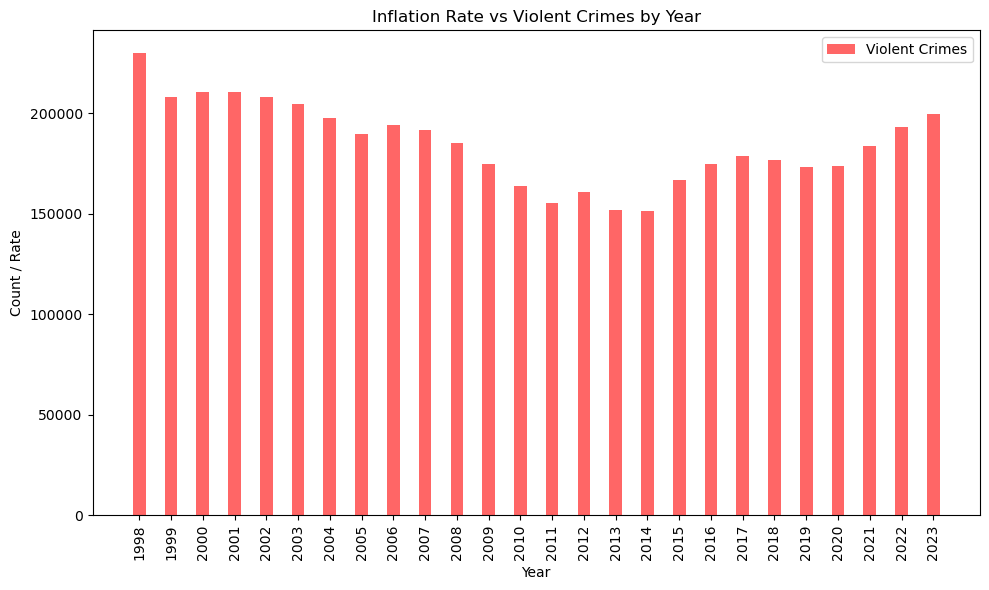

In [13]:
# Plotting
plt.figure(figsize=(10, 6))

# Plotting the bars
plt.bar(df['Year'] , df['Violent_Crimes'], width=0.4, label='Violent Crimes', color='red', alpha=0.6,  align='center')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Count / Rate')
plt.title('Inflation Rate vs Violent Crimes by Year')
plt.xticks(df['Year'])
plt.legend()

plt.xticks(rotation=90)

# Display the plot
plt.tight_layout()
plt.show()

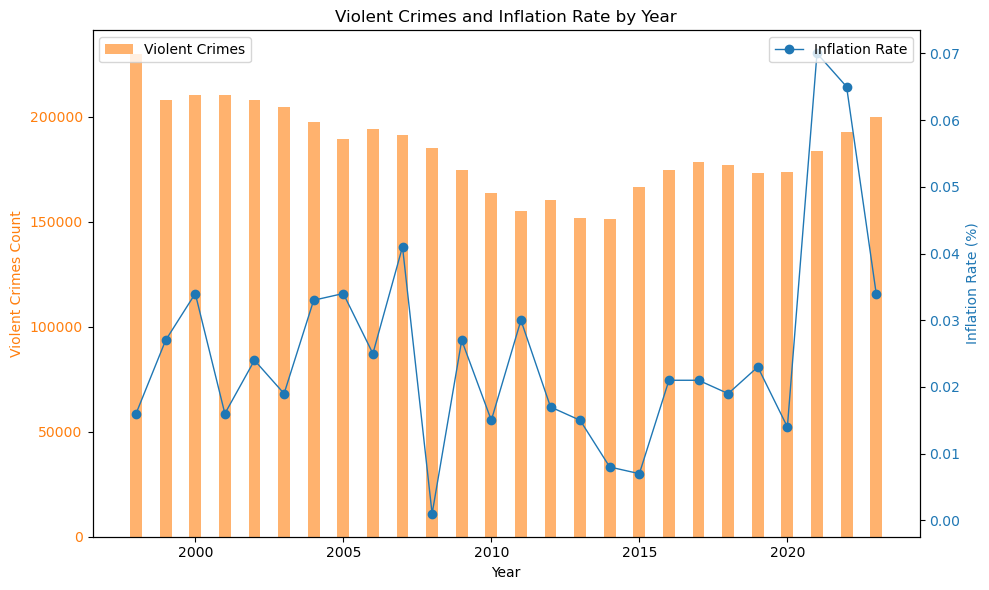

In [14]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting the bars for Violent Crimes
ax1.bar(df['Year'], df['Violent_Crimes'], width=0.4, label='Violent Crimes', color='#ff7f0e', alpha=0.6, align='center')

# Adding labels and title for the first plot (Violent Crimes)
ax1.set_xlabel('Year')
ax1.set_ylabel('Violent Crimes Count', color='#ff7f0e')
ax1.tick_params(axis='y', labelcolor='#ff7f0e')

# Creating the second y-axis for Inflation Rate (line plot)
ax2 = ax1.twinx()
ax2.plot(df['Year'], df['Inflation_Rate'], marker='o', color='#1f77b4', linewidth=1
         , label='Inflation Rate')

# Adding labels and title for the second plot (Inflation Rate)
ax2.set_ylabel('Inflation Rate (%)', color='#1f77b4')
ax2.tick_params(axis='y', labelcolor='#1f77b4')

# Adding title and legend
ax1.set_title('Violent Crimes and Inflation Rate by Year')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Display the plot
plt.tight_layout()
plt.show()

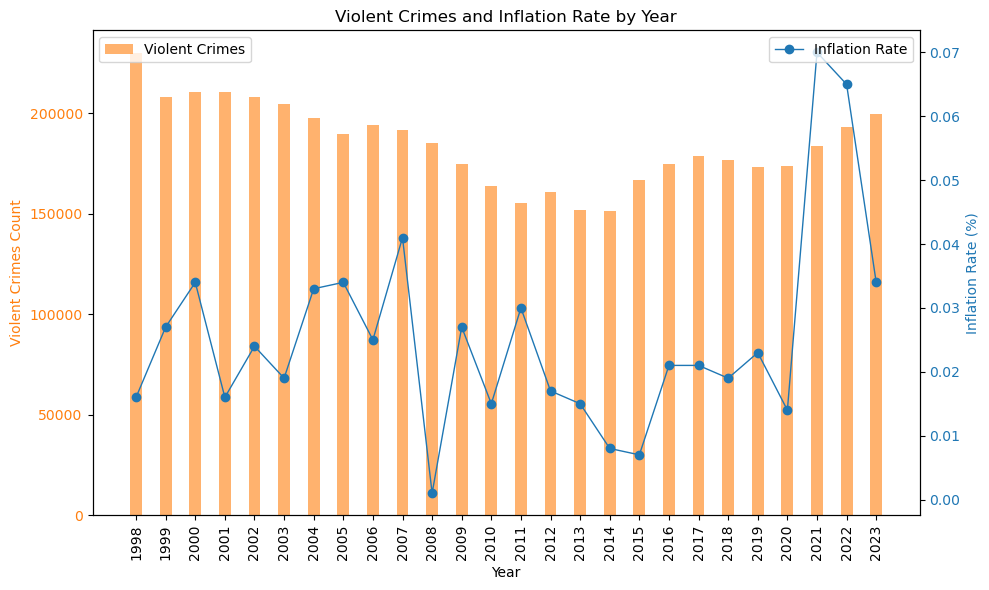

In [15]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting the bars for Violent Crimes
ax1.bar(df['Year'], df['Violent_Crimes'], width=0.4, label='Violent Crimes', color='#ff7f0e', alpha=0.6, align='center')

# Adding labels and title for the first plot (Violent Crimes)
ax1.set_xlabel('Year')
ax1.set_ylabel('Violent Crimes Count', color='#ff7f0e')
ax1.tick_params(axis='y', labelcolor='#ff7f0e')

# Adding xticks for years
ax1.set_xticks(df['Year'])
ax1.set_xticklabels(df['Year'], rotation=90)

# Creating the second y-axis for Inflation Rate (line plot)
ax2 = ax1.twinx()
ax2.plot(df['Year'], df['Inflation_Rate'], marker='o', color='#1f77b4', linewidth=1, label='Inflation Rate')

# Adding labels and title for the second plot (Inflation Rate)
ax2.set_ylabel('Inflation Rate (%)', color='#1f77b4')
ax2.tick_params(axis='y', labelcolor='#1f77b4')

# Adding title and legend
ax1.set_title('Violent Crimes and Inflation Rate by Year')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Display the plot
plt.tight_layout()
plt.show()